In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [2]:
#define the dataframe, took a lot of searching to figure out proper encoding
wellcome_apc_spend = pd.read_csv('WELLCOME.csv', encoding ='latin1')

In [3]:
wellcome_apc_spend

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [4]:
#learn the sive and attributes of the data set
wellcome_apc_spend.describe()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,In Process,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [5]:
#Many publishers written in different ways

## Determine the five most common journals and the total articles for each


In [6]:
wellcome_apc_spend['Journal title']

0                                  Psychological Medicine
1                                       Biomacromolecules
2                                              J Med Chem
3                                              J Med Chem
4                                              J Org Chem
5                          Journal of Medicinal Chemistry
6                            Journal of Proteome Research
7                                               Mol Pharm
8                                    ACS Chemical Biology
9                                    ACS Chemical Biology
10           Journal of Chemical Information and Modeling
11                         Journal of Medicinal Chemistry
12                         Journal of Medicinal Chemistry
13                                           Biochemistry
14                         Journal of Medicinal Chemistry
15                                       Gastroenterology
16                        Journal of Biological Chemistry
17            

In [7]:
#Journals have been capitalized differently for the same journal

In [8]:
wellcome_apc_spend['Journal title'] = wellcome_apc_spend['Journal title'].str.lower()

In [9]:
wellcome_apc_spend['Journal title'].value_counts()

plos one                                                                                                                        190
journal of biological chemistry                                                                                                  53
neuroimage                                                                                                                       29
plos genetics                                                                                                                    24
plos pathogens                                                                                                                   24
nucleic acids research                                                                                                           23
proceedings of the national academy of sciences                                                                                  20
plos neglected tropical diseases                                            

In [10]:
wellcome_apc_spend['Journal title'].value_counts()[:5] # Top 5 only

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos genetics                       24
plos pathogens                      24
Name: Journal title, dtype: int64

## Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal

In [11]:
wellcome_apc_spend['Cost'] = wellcome_apc_spend['COST (£) charged to Wellcome (inc VAT when charged)'].str.lstrip('£')

In [12]:
wellcome_apc_spend.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,2381.04
2,23043264 PMC3506128,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56
3,23438330 PMC3646402,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64
4,23438216 PMC3601604,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88,685.88


In [13]:
wellcome_apc_spend['Cost'] = pd.to_numeric(wellcome_apc_spend.Cost, errors='coerce')

In [14]:
np.mean(wellcome_apc_spend['Cost'])

24206.441892147646

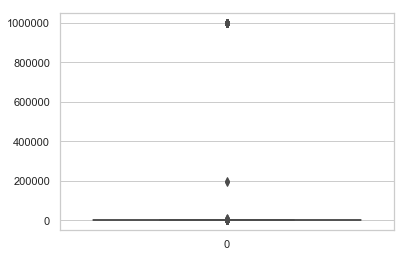

In [15]:
sns.set(style="whitegrid")
sns.boxplot(data=wellcome_apc_spend['Cost'])

Need to remove the obvious outlier(s)

In [16]:
wellcome_apc_spend.drop(wellcome_apc_spend[(wellcome_apc_spend.Cost > 10000.0)].index, inplace=True)

In [17]:
wellcome_apc_spend.drop(wellcome_apc_spend[(wellcome_apc_spend.Cost < 10.0)].index, inplace=True)

In [20]:
sns.set(style="whitegrid")
sns.boxplot(data=wellcome_apc_spend['Cost'])

KeyError: 0

Better.

In [21]:
wellcome_apc_spend.describe()

,Cost
count,2062.000000
mean,1826.181489
std,767.458149
min,45.940000
25%,1269.740000
50%,1861.785000
75%,2302.930000
max,6000.000000


Min of 0, looks like there's just one but should be removed

Mean, median, std. etc for cost

In [22]:
wellcome_apc_spend.describe()

,Cost
count,2062.000000
mean,1826.181489
std,767.458149
min,45.940000
25%,1269.740000
50%,1861.785000
75%,2302.930000
max,6000.000000


In [23]:
wellcome_apc_spend.groupby('Journal title', sort=False).describe()

Cost               \
                                                   count         mean   
Journal title                                                           
biomacromolecules                                    1.0  2381.040000   
j med chem                                           2.0   656.100000   
j org chem                                           1.0   685.880000   
journal of medicinal chemistry                       6.0  1222.363333   
journal of proteome research                         2.0  1844.915000   
mol pharm                                            1.0   649.330000   
acs chemical biology                                 5.0  1418.186000   
journal of chemical information and modeling         1.0  1329.690000   
biochemistry                                         1.0   665.640000   
gastroenterology                                     2.0  1233.040000   
journal of biological chemistry                     52.0  1423.588462   
journal of immunology                                3.0  2358.590000   
acs chemical neuroscience                            1.0  1186.800000   
acs nano                                             2.0   668.140000   
american chemical society                            1.0  1533.290000   
analytical chemistry                                 3.0  1718.836667   
bioconjugate chemistry                               1.0  1565.260000   
journal of medicinal chemistry                       1.0   321.120000   
journal of the american chemical society             1.0  1626.140000   
chest                                                1.0  2383.940000   
journal of neurophysiology                           6.0  1419.548333   
journal of physiology                                7.0  2038.121429   
the journal of neurophysiology                       1.0  1276.600000   
american journal of psychiatry                       1.0  2351.730000   
americal journal of psychiatry                       1.0  2350.020000   
behavioral neuroscience                              3.0  3147.706667   
emotion                                              1.0  2534.530000   
health psychology                                    1.0  3188.300000   
journal of abnormal psychology                       1.0  2534.530000   
journal of consulting and clinical psychology        1.0  3037.860000   
...                                                  ...          ...   
criminal behavior and mental health                  1.0  2377.650000   
depression and anxiety                               1.0  2368.420000   
dermatologic surgery                                 1.0  2257.560000   
economic history review                              1.0  1901.020000   
genetic epidemology                                  1.0  1911.300000   
hpb                                                  1.0  2311.560000   
international journal of experimental pathology      1.0  2320.030000   
journal of comparative neurology                     1.0  1909.730000   
journal of evaluation in clinical practice           2.0  2301.530000   
journal of microscopy                                1.0  2400.000000   
journal of orthopedic research                       1.0  2374.520000   
journal of viral hepatitis                           1.0  2350.490000   
obesity reviews                                      2.0  2324.295000   
statistics in medicine                               1.0   791.190000   
synapse                                              1.0  1961.680000   
the european journal of neuroscience                 1.0  1982.350000   
zoonoses and public health                           1.0  2272.150000   
angew chems int ed                                   1.0  3026.170000   
chemmedchem                                          3.0  1932.546667   
protemics                                            1.0  1409.960000   
journal of small animal practice                     1.0  2400.000000   
aids                                 

In [24]:
wellcome_apc_spend.sort_values(['Cost'], ascending=False).groupby('Journal title', sort=False).describe()

Cost               \
                                                   count         mean   
Journal title                                                           
public service review                                1.0  6000.000000   
the lancet neurology                                 2.0  5040.000000   
elsevier                                             7.0  2625.421429   
lancet                                               1.0  4800.000000   
the lancet                                           3.0  4558.003333   
cell host & microbe                                  1.0  4226.040000   
neuron                                               9.0  3565.644444   
cell                                                 4.0  3171.767500   
curr biol.                                           1.0  4151.770000   
molecular cell                                       3.0  3925.736667   
current biology                                     11.0  3511.682727   
developmental cell                                  12.0  3292.271667   
structure                                            7.0  3881.824286   
cell metabolism                                      3.0  3924.260000   
immunity                                             2.0  3934.750000   
cell journal                                         1.0  4041.050000   
cell reports                                         9.0  3644.226667   
american journal of human genetics                   5.0  2684.510000   
cell press - cell reports                            1.0  3884.400000   
cell host and microbe                                1.0  3838.880000   
nature communications                               18.0  3134.133333   
antimicrobial agfents and chemotherapy               1.0  3750.050000   
cell stem cell                                       2.0  3534.065000   
the american journal of human genetics               4.0  2437.452500   
lancet global health                                 1.0  3678.780000   
development cell                                     1.0  3630.640000   
journal od clinical endocrinology                    1.0  3602.410000   
bmj                                                 10.0  2751.000000   
lancet infect dis                                    1.0  3600.000000   
neglected tropical disease                           2.0  3600.000000   
...                                                  ...          ...   
journal of parasitology research                     1.0   623.950000   
proceddings of the national academy of sciences...   1.0   619.830000   
journal of medical virology                          1.0   612.590000   
bmc genomics                                         1.0   608.520000   
epigentics                                           2.0   508.660000   
proceedings of the national academy of sciences...   2.0   584.675000   
autophagy                                            1.0   601.100000   
journal of historical geography                      1.0   596.460000   
rna biology                                          3.0   490.123333   
health                                               1.0   551.270000   
theranostics                                         1.0   543.290000   
journal of visualized experiements                   1.0   517.500000   
epigenetics                                          2.0   490.485000   
neuroscientist                                       1.0   480.930000   
frontiers in cognitive science                       1.0   434.700000   
j infect dis                                         1.0   378.780000   
haematologica/the haematology journal                1.0   378.700000   
frontiers in genetics                                1.0   346.250000   
physics in biology and medicine\n                    1.0   340.000000   
cell adhesion and migration                          1.0   321.460000   
journal of medicinal chemistry                       1.0   321.120000   
essays in biochemistry               